<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/Find_best_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
from torch import tensor
from torch.nn import Linear,ReLU,Sigmoid
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# data

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

bos = load_boston()
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 特徵縮放

In [4]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Price',axis=1)
y = df['Price']

mm = MinMaxScaler().fit(X)
X[:] = mm.transform(X[:])

X.join(y).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# 向量化

In [0]:
X = X.to_numpy()
Y = y.to_numpy()

# 切分資料集

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# tensor化

In [7]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([354, 13])
torch.Size([152, 13])
torch.Size([354, 1])
torch.Size([152, 1])


# Construct the neural network

In [8]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,256),ReLU(),
      Linear(256,128),ReLU(),
      Linear(128,64),ReLU(),
      Linear(64,32),ReLU(),
      Linear(32,16),ReLU(),
      Linear(16,8),ReLU(),
      Linear(8,output_shape)
      )
  return net

def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0)

net = build_net(X_train.shape[1],Y_train.shape[1])
net.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=13, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=8, bias=True)
  (11): ReLU()
  (12): Linear(in_features=8, out_features=1, bias=True)
)

In [9]:
# test
mini_batch = X_train[0:5]
net(mini_batch)

tensor([[0.0773],
        [0.0837],
        [0.0574],
        [0.0703],
        [0.0912]], grad_fn=<AddmmBackward>)

# The usage of DataLoader

In [0]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=128, shuffle=True)

# Loss function and optimizer

In [0]:
loss_function = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=0.0002)

# Training and evaluation

In [0]:
def train(net,train_iter,loss_function,optimizer,num_epochs=500):
  history = []
  for epoch in range(num_epochs):
    for x,y in train_iter:
      loss = loss_function(net(x),y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss 566.4850
epochs 1 loss 638.9546
epochs 2 loss 521.2278
epochs 3 loss 556.3463
epochs 4 loss 608.0468
epochs 5 loss 578.3714
epochs 6 loss 555.1410
epochs 7 loss 546.0974
epochs 8 loss 542.8843
epochs 9 loss 561.6533
epochs 10 loss 572.2120
epochs 11 loss 527.5114
epochs 12 loss 526.5989
epochs 13 loss 551.0486
epochs 14 loss 480.0778
epochs 15 loss 409.3257
epochs 16 loss 547.6725
epochs 17 loss 457.4003
epochs 18 loss 438.8082
epochs 19 loss 405.8566
epochs 20 loss 409.5986
epochs 21 loss 425.4425
epochs 22 loss 343.0398
epochs 23 loss 363.1266
epochs 24 loss 303.9435
epochs 25 loss 233.9698
epochs 26 loss 259.3962
epochs 27 loss 206.0773
epochs 28 loss 193.2438
epochs 29 loss 136.5106
epochs 30 loss 122.1734
epochs 31 loss 137.9547
epochs 32 loss 139.4664
epochs 33 loss 120.9392
epochs 34 loss 146.6852
epochs 35 loss 151.6649
epochs 36 loss 138.9177
epochs 37 loss 111.7829
epochs 38 loss 85.2379
epochs 39 loss 101.0807
epochs 40 loss 120.2431
epochs 41 loss 86.4979
epoc

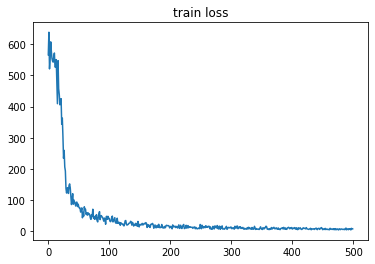

In [13]:
net = train(net,train_iter,loss_function,optimizer,500)

In [14]:
from sklearn.metrics import r2_score

y_pred = net(X_test).detach().numpy().ravel()
y_real = Y_test.numpy().ravel()
print(y_pred.shape,y_real.shape)
r2_score(y_real,y_pred)

(152,) (152,)


0.8573791007021546

In [0]:
price_model = net

# find the what condition can make high price 

In [0]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,128),
      Linear(128,output_shape),
      Sigmoid()
      )
  return net

In [17]:
net = build_net(10,X_train.shape[1])
net.apply(init_weights)
net

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=13, bias=True)
  (2): Sigmoid()
)

In [18]:
noise = torch.tensor(np.random.uniform(size=(5000,10)), dtype=torch.float)
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

In [19]:
obj_function = lambda x:price_model(x).mean()
obj_function

<function __main__.<lambda>>

In [0]:
optimizer = optim.Adam(net.parameters(),lr=0.0001)

In [0]:
def train2(net,noise_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for noise in noise_iter:
      loss = obj_function(net(noise[0]))
      loss *= -1
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss -10.4281
epochs 1 loss -14.3161
epochs 2 loss -18.8804
epochs 3 loss -24.7828
epochs 4 loss -33.6029
epochs 5 loss -43.4978
epochs 6 loss -52.4856
epochs 7 loss -59.7848
epochs 8 loss -65.2535
epochs 9 loss -69.2601
epochs 10 loss -72.2451
epochs 11 loss -74.4361
epochs 12 loss -76.0556
epochs 13 loss -77.2416
epochs 14 loss -78.1405
epochs 15 loss -78.8416
epochs 16 loss -79.3957
epochs 17 loss -79.8395
epochs 18 loss -80.2244
epochs 19 loss -80.6086
epochs 20 loss -81.3655
epochs 21 loss -82.5103
epochs 22 loss -83.3638
epochs 23 loss -83.7390
epochs 24 loss -83.9880
epochs 25 loss -84.1770
epochs 26 loss -84.3258
epochs 27 loss -84.4467
epochs 28 loss -84.5470
epochs 29 loss -84.6315
epochs 30 loss -84.7037
epochs 31 loss -84.7660
epochs 32 loss -84.8202
epochs 33 loss -84.8678
epochs 34 loss -84.9098
epochs 35 loss -84.9472
epochs 36 loss -84.9805
epochs 37 loss -85.0104
epochs 38 loss -85.0373
epochs 39 loss -85.0617
epochs 40 loss -85.0838
epochs 41 loss -85.1039
ep

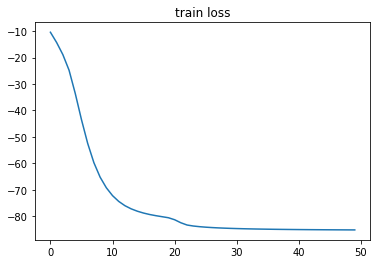

In [22]:
G = train2(net,noise_iter,obj_function,optimizer,num_epochs=50)

In [23]:
a = pd.DataFrame(G(noise).detach().numpy(),columns = bos.feature_names)
b = pd.Series(price_model(G(noise)).detach().numpy().ravel(),name='price')

a[:] = mm.inverse_transform(a[:])
res = a.join(b)
res = round(res,2) 
res

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.45,99.470001,27.230000,1.0,0.39,8.77,4.71,1.16,23.900000,190.139999,12.62,395.440002,1.78,84.790001
1,0.08,99.849998,27.600000,1.0,0.39,8.78,3.71,1.14,23.980000,187.949997,12.60,396.559998,1.74,85.269997
2,0.15,99.669998,27.490000,1.0,0.39,8.78,3.89,1.14,23.959999,189.029999,12.61,396.200012,1.76,85.120003
3,0.26,99.510002,27.350000,1.0,0.39,8.77,5.07,1.16,23.900000,190.009995,12.62,395.290009,1.79,84.860001
4,0.20,99.489998,27.459999,1.0,0.39,8.78,4.74,1.15,23.950001,189.990005,12.61,395.839996,1.77,85.029999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.06,99.889999,27.620001,1.0,0.39,8.78,3.48,1.13,23.980000,187.770004,12.60,396.640015,1.74,85.290001
4996,0.10,99.849998,27.590000,1.0,0.39,8.78,4.11,1.14,23.969999,188.050003,12.60,396.429993,1.75,85.230003
4997,0.04,99.930000,27.670000,1.0,0.39,8.78,3.37,1.13,23.990000,187.429993,12.60,396.720001,1.74,85.330002
4998,0.11,99.830002,27.590000,1.0,0.39,8.78,3.92,1.14,23.969999,188.059998,12.60,396.500000,1.74,85.230003
